代码运行结果展示：每一个代码运行单元格上方有一个markdown单元格说明，与Projecttask要求对应

下面的单元格为文件“task_1,3_k_means”运行结果展示（上图为训练集分类情况，下图为k=3时模型的分类情况）。涉及Project任务1,3

loss0:5.103776460145167
iterate_number0:assignment1[0 0 0 0 0 0 0 0 1 1 0 2 0 0 2 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 2 0 0 0 0 0 0
 1 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2]
loss1:2.061434922188071
iterate_number:1
assignment1[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2]
loss2:2.054383316445811
iterate_number:2
as

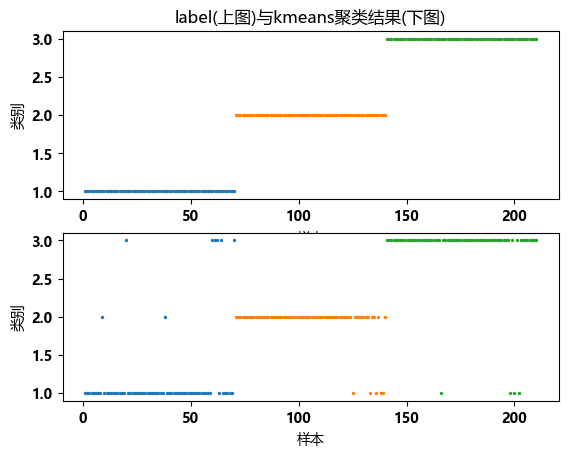

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler


class k_means:
    
    k = None
    cluster = None
    def __init__(self,k):
        self.k = k
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)
        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any():
            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\nassignment1{assignment1}")
            iterate_number+=1
        print("iterate_number:",iterate_number)
        return assignment1
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        num = np.bincount(assign)
        data =  data[assign.argsort()]
        a = 0
        for i in num:
            self.cluster.append(np.mean(data[a:a+i,:],axis=0))
            a += i
        self.cluster = np.array(self.cluster)
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


    def assignment_optimize(self):
        return
    
    def means_optimize(self):
        return




# filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg"
filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt"



data_complete = np.loadtxt(filepath,dtype = float)
data = data_complete[:,0:-1]
data = StandardScaler().fit_transform(data)#数据归一化

kmeans = k_means(3)
# kmeans.random_cluster(data)
# a = kmeans.assign(data)
# kmeans.renew_cluster(data,a)
output = kmeans.classify(data)

print(output)


target = data_complete[:,-1]#用于题目三验证
x = np.arange(1,211)
plt.subplot(2,1,1)
plt.scatter(x[0:70],target[0:70],s = 2)
plt.scatter(x[70:140],target[70:140],s = 2)
plt.scatter(x[140:210],target[140:210],s = 2)
plt.title('label(上图)与kmeans聚类结果(下图)')
plt.xlabel('样本')
plt.ylabel('类别')
plt.subplot(2,1,2)
plt.scatter(x[0:70],output[0:70]+1,s = 2)
plt.scatter(x[70:140],output[70:140]+1,s = 2)
plt.scatter(x[140:210],output[140:210]+1,s = 2)
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()


下面的单元格为文件“task_2,3_k_means”运行结果展示（上图为训练集分类情况，下图为k=3时，模型的分类情况）。涉及Project任务2,3

self.cluster:[[-0.95341008 -1.02029413 -0.19507717 -1.19801941 -0.85613782 -1.52349476
  -0.91181583]
 [-0.2816364  -0.30647202  0.36488339 -0.43106376 -0.15287318 -1.3221578
  -0.83023461]
 [-1.26345948 -1.16612876 -1.88344309 -0.92426828 -1.50101823 -0.24547173
  -0.83023461]]
loss0:7.737742314865565
iterate_number0:assignment1[[6.30162479e-03 1.77932653e-02 2.06882494e-02 3.99321263e-02
  5.56720861e-04 2.23912849e-02 1.32499610e-02 2.93092691e-02
  2.49095797e-04 3.22039050e-04 5.32701179e-03 8.28363966e-02
  4.29768513e-02 8.97373718e-02 1.19221964e-01 1.08667578e-02
  1.33067826e-02 1.46500558e-03 1.05378810e-02 4.51767850e-01
  6.60108880e-02 6.32873982e-02 1.46422593e-03 9.12053960e-01
  1.39625059e-02 1.08293827e-03 3.86286239e-01 6.05701895e-01
  3.55637752e-02 1.90817897e-01 5.01563265e-01 2.82902062e-03
  4.26349032e-02 7.70130715e-02 6.55778078e-03 5.21932163e-04
  7.99543314e-04 3.87930425e-05 7.83092184e-03 8.25040651e-03
  1.18523608e-01 1.38934955e-01 1.92897099e-01 7.

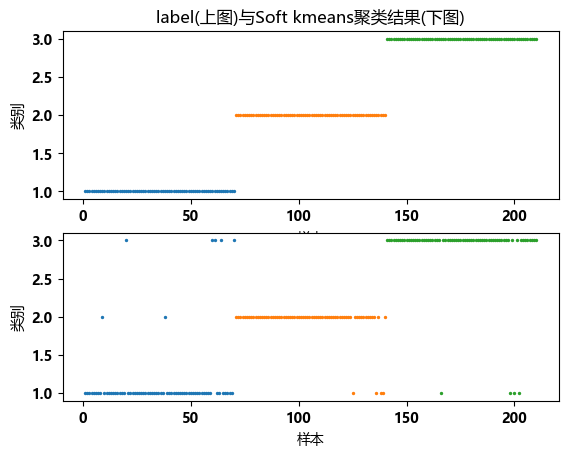

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler


class soft_k_means:
    cluster = []
    k = None
    cluster = None
    def __init__(self,k):
        self.k = k
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < 1000:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return







# filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\作业\\作业8\\optdigits.tra"
filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt"



data = np.loadtxt(filepath,dtype = float)
data_complete = np.loadtxt(filepath,dtype = float)
data = data_complete[:,0:-1]
data = StandardScaler().fit_transform(data)#数据归一化

kmeans = soft_k_means(3)
# kmeans.random_cluster(data)
# a = kmeans.assign(data)
# kmeans.renew_cluster(data,a)
output = kmeans.classify(data)

print(output)
target = data_complete[:,-1]#用于题目三验证
x = np.arange(1,211)
plt.subplot(2,1,1)
plt.scatter(x[0:70],target[0:70],s = 2)
plt.scatter(x[70:140],target[70:140],s = 2)
plt.scatter(x[140:210],target[140:210],s = 2)
plt.title('label(上图)与Soft kmeans聚类结果(下图)')
plt.xlabel('样本')
plt.ylabel('类别')
plt.subplot(2,1,2)
plt.scatter(x[0:70],output[0:70]+1,s = 2)
plt.scatter(x[70:140],output[70:140]+1,s = 2)
plt.scatter(x[140:210],output[140:210]+1,s = 2)
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()

下面的单元格为文件“task_3_compare”的代码运行结果展示，完成Project任务3的比较任务。图象展示了训练集的分类，以及k = 3时，keans和soft kmeans两个模型各自的分类情况   performance用两个模型分类的准确率表示，得到kmeans accuracy=0.919047619047619；soft kmeans accuracy=0.9285714285714286；两者差异在这里可以忽略不计

self.cluster:[[-0.85350528 -0.83608197 -0.60656333 -0.96046678 -0.79244593  0.14586866
  -0.83023461]
 [-0.05082185 -0.26809448  1.87932217 -0.95820437  0.55039147 -1.28882387
  -1.54814936]
 [-0.91551516 -0.92051255 -0.55565783 -0.87902016 -0.9277912   0.77121327
  -0.51002832]]
loss0:8.85949308440489
iterate_number0:assignment1[[5.89939837e-01 1.32061887e-02 3.00833226e-03 9.75177623e-03
  2.96261864e-05 2.26430538e-02 6.34684873e-01 1.14924239e-01
  2.51495285e-01 7.06397395e-03 4.65622617e-01 3.10982299e-01
  5.91877630e-01 7.75120042e-01 8.06044868e-01 9.63565113e-02
  2.09439220e-02 4.35122662e-05 9.89472096e-06 6.28323440e-01
  7.59652481e-01 7.83767594e-01 3.65641697e-05 9.26196730e-01
  6.79018186e-01 2.07454914e-03 7.73013091e-01 8.64391956e-01
  5.73511067e-01 6.88187027e-01 9.06940315e-01 6.64048268e-01
  5.81027115e-01 7.85090217e-01 3.58568539e-01 1.32610876e-03
  4.65262737e-01 1.08081661e-04 5.61166075e-01 1.68721512e-01
  5.79872978e-01 5.54730737e-01 3.06565593e-02 3.

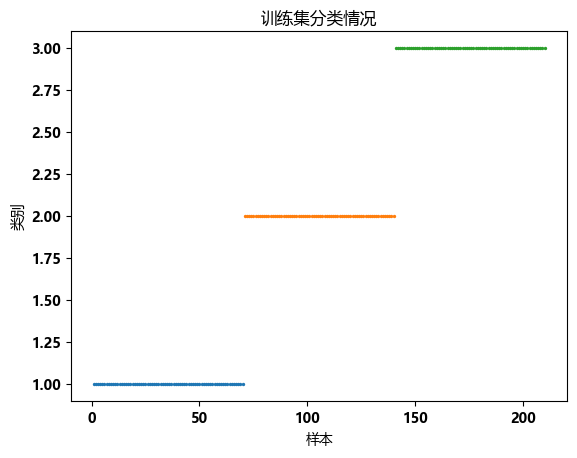

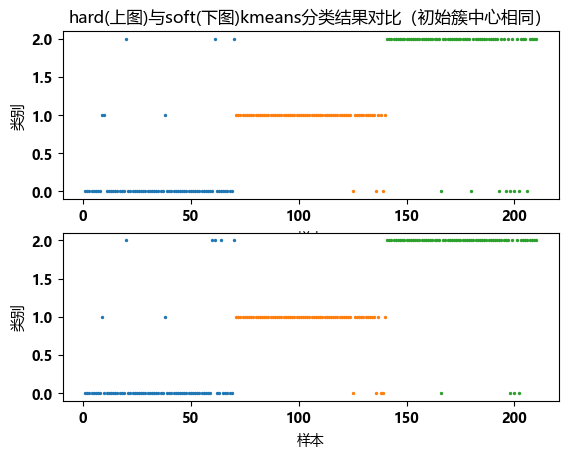

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler


class soft_k_means:
    hard_cluster = None
    k = None
    cluster = None
    def __init__(self,k):
        self.k = k
        return
    

    def hard_renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        num = np.bincount(assign)
        data =  data[assign.argsort()]
        a = 0
        for i in num:
            self.cluster.append(np.mean(data[a:a+i,:],axis=0))
            a += i
        self.cluster = np.array(self.cluster)
        return
    
    def hard_classify(self,data):
        self.cluster = self.hard_cluster
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign_old(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.hard_renew_cluster(data,assignment1)
        
        assignment2 = self.assign_old(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any():
            assignment1 = assignment2
            self.hard_renew_cluster(data,assignment1)
            assignment2 = self.assign_old(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign_old(data)


    def classify(self,data):
        self.random_cluster(data)
        self.hard_cluster = self.cluster.copy()#保证hard与softkeans一开始的随机生成簇中心值一致
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < 1000:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss


    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return






# filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\作业\\作业8\\optdigits.tra"
# filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt"
filepath = 'C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt'


data = np.loadtxt(filepath,dtype = float)
data_complete = np.loadtxt(filepath,dtype = float)
data = data_complete[:,0:-1]
data = StandardScaler().fit_transform(data)#数据归一化

kmeans = soft_k_means(3)
# kmeans.random_cluster(data)
# a = kmeans.assign(data)
# kmeans.renew_cluster(data,a)
output = kmeans.classify(data)
output_hard = kmeans.hard_classify(data)
a1 = np.max(np.bincount(output_hard[0:70]))
a2 = np.max(np.bincount(output_hard[70:140]))
a3 = np.max(np.bincount(output_hard[140:210]))
print(f'kmeans accuracy:{(a1+a2+a3)/210}')
a1 = np.max(np.bincount(output[0:70]))
a2 = np.max(np.bincount(output[70:140]))
a3 = np.max(np.bincount(output[140:210]))
print(f'soft kmeans accuracy:{(a1+a2+a3)/210}')

#print(output)
target = data_complete[:,-1]#用于验证

x = np.arange(1,211)
plt.scatter(x[0:70],target[0:70],s = 2)
plt.scatter(x[70:140],target[70:140],s = 2)
plt.scatter(x[140:210],target[140:210],s = 2)
plt.title('训练集分类情况')
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()

plt.subplot(2,1,1)
plt.scatter(x[0:70],output_hard[0:70],s = 2)
plt.scatter(x[70:140],output_hard[70:140],s = 2)
plt.scatter(x[140:210],output_hard[140:210],s = 2)
plt.title('hard(上图)与soft(下图)kmeans分类结果对比（初始簇中心相同）')
plt.xlabel('样本')
plt.ylabel('类别')
plt.subplot(2,1,2)
plt.scatter(x[0:70],output[0:70],s = 2)
plt.scatter(x[70:140],output[70:140],s = 2)
plt.scatter(x[140:210],output[140:210],s = 2)
plt.xlabel('样本')
plt.ylabel('类别')

plt.show()

以下单元格为文件“task_4_k=10_kmeans与soft_kmeans对比”运行结果。完成Project任务4中k = 10的kmeans与soft_kmeans的比较与演示。其中softkmeans最大训练次数为1000

self.cluster:[[-0.34709127 -0.47533316  1.03938133 -0.68897805  0.31950836 -0.96081795
  -1.2299826 ]
 [-0.89140021 -0.73630039 -1.59922069 -0.49893595 -1.12948219  0.70387872
  -0.09804315]
 [ 1.23416063  1.08279469  1.55692063  0.79516031  1.35980926 -0.47747591
   1.013501  ]
 [-0.26096644 -0.11458435 -0.7677641   0.20014752 -0.19268061  0.14653534
  -0.22245451]
 [-0.9430751  -0.98959211 -0.3011303  -0.88806979 -0.7526385   0.28787122
  -0.80779978]
 [ 0.85176638  1.03674165 -0.47081532  0.98520242  0.38320025  0.08253419
   1.04817302]
 [ 0.47626211  0.47642966  0.59395816  0.55082046  0.56631444  0.04586686
   1.04817302]
 [ 1.38918533  1.30538438  1.09877109  1.03045054  1.34123246 -1.36749195
   1.42956523]
 [-0.50900595 -0.59814127  0.58971604 -0.69802768 -0.34660268  0.64654435
  -0.64667686]
 [-0.72604053 -0.68257184 -0.61928971 -0.52834722 -0.80306125 -0.79748168
  -1.09945264]]
loss0:1.6404339048849093
iterate_number0:assignment1[[1.62753187e-01 9.03110718e-01 9.40814981e-

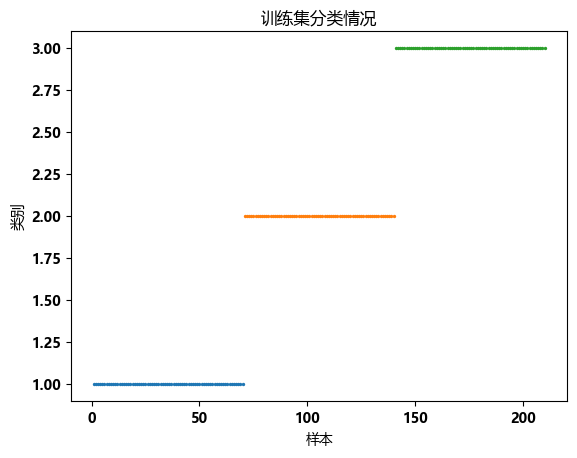

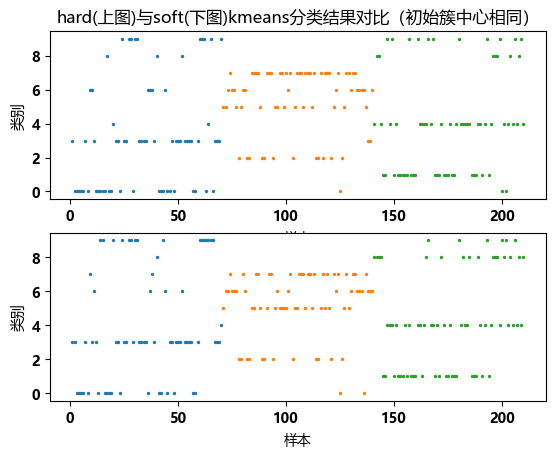

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler


class soft_k_means:
    hard_cluster = None
    k = None
    cluster = None
    def __init__(self,k):
        self.k = k
        return
    

    def hard_renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        num = np.bincount(assign)
        data =  data[assign.argsort()]
        a = 0
        for i in num:
            self.cluster.append(np.mean(data[a:a+i,:],axis=0))
            a += i
        self.cluster = np.array(self.cluster)
        return
    
    def hard_classify(self,data):
        self.cluster = self.hard_cluster
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign_old(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.hard_renew_cluster(data,assignment1)
        
        assignment2 = self.assign_old(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any():
            assignment1 = assignment2
            self.hard_renew_cluster(data,assignment1)
            assignment2 = self.assign_old(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign_old(data)


    def classify(self,data):
        self.random_cluster(data)
        self.hard_cluster = self.cluster.copy()#保证hard与softkeans一开始的随机生成簇中心值一致
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < 1000:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss


    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return






# filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\作业\\作业8\\optdigits.tra"
filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt"


data = np.loadtxt(filepath,dtype = float)
data_complete = np.loadtxt(filepath,dtype = float)
data = data_complete[:,0:-1]
data = StandardScaler().fit_transform(data)#数据归一化

kmeans = soft_k_means(10)
# kmeans.random_cluster(data)
# a = kmeans.assign(data)
# kmeans.renew_cluster(data,a)
output = kmeans.classify(data)
output_hard = kmeans.hard_classify(data)

print(output)
target = data_complete[:,-1]#用于验证

x = np.arange(1,211)
plt.scatter(x[0:70],target[0:70],s = 2)
plt.scatter(x[70:140],target[70:140],s = 2)
plt.scatter(x[140:210],target[140:210],s = 2)
plt.title('训练集分类情况')
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()

plt.subplot(2,1,1)
plt.scatter(x[0:70],output_hard[0:70],s = 2)
plt.scatter(x[70:140],output_hard[70:140],s = 2)
plt.scatter(x[140:210],output_hard[140:210],s = 2)
plt.title('hard(上图)与soft(下图)kmeans分类结果对比（初始簇中心相同）')
plt.xlabel('样本')
plt.ylabel('类别')
plt.subplot(2,1,2)
plt.scatter(x[0:70],output[0:70],s = 2)
plt.scatter(x[70:140],output[70:140],s = 2)
plt.scatter(x[140:210],output[140:210],s = 2)
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()

以下单元格为文件“task_4_添加Merge后soft与hard对比”运行结果。完成Project任务4中non-local split-and-merge moves算法的添加。结果为k = 10时，kmeans与soft_kmeans的比较与演示。其中softkmeans最大训练次数为1000

self.cluster:[[-1.15666469 -1.02796964 -1.89616947 -0.73422617 -1.49571058  1.12521965
  -0.20001967]
 [-1.02575494 -1.18147977  0.36064126 -1.12336001 -0.81102273 -0.06880188
  -0.56305611]
 [-1.18766963 -1.13542673 -1.42105142 -1.11431039 -1.31525021  1.25855539
  -0.65075592]
 [-1.18422463 -1.23520832 -0.63625821 -1.21838107 -1.28340427  0.83788114
  -1.18919199]
 [ 0.93100122  0.84485398  1.19209785  0.36756557  1.14484913  1.11055272
   0.51585555]
 [-0.97408004 -0.94353907 -0.87805936 -0.6301555  -1.19052026  0.38053956
  -0.20409874]
 [ 1.13425583  1.19792729  0.26307238  0.97389039  0.80781286 -0.05413494
   1.22969124]
 [-0.67436563 -0.60581678 -0.7168586  -0.30210662 -0.61729323  1.65656256
  -0.18778249]
 [-0.26096644 -0.11458435 -0.7677641   0.20014752 -0.19268061  0.14653534
  -0.22245451]
 [ 0.95856117  1.0904702  -0.15689804  1.27252799  0.80250521  0.25053721
   1.32962823]]
loss0:2.105418976895212
iterate_number0:assignment1[[2.69847853e-06 6.72074883e-07 2.48695331e-0

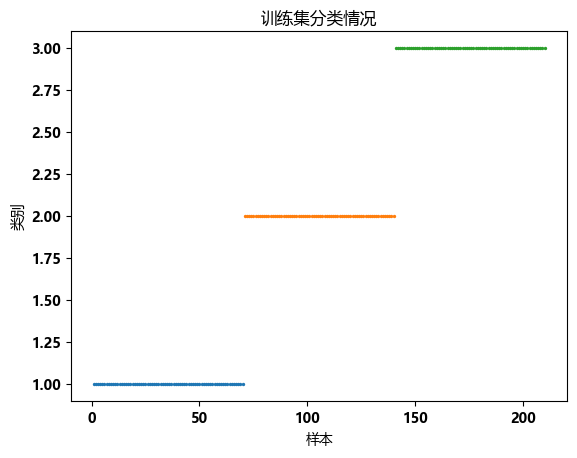

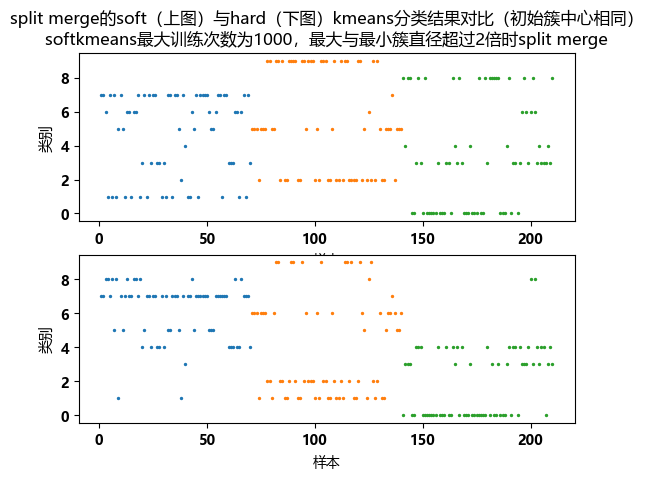

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler


class k_means:
    
    k = None
    cluster = None
    simple_cluster = None#记录簇的中心位置，未添加split and merge，用作对比
    def __init__(self,k):
        self.k = k
        return
    
    def soft_classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.soft_assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.soft_renew_cluster(data,assignment1)
        
        assignment2 = self.soft_assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < 1000:
        

            assignment1 = assignment2
            self.soft_renew_cluster(data,assignment1)
            assignment2 = self.soft_assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}")
            iterate_number+=1
        print("iterate_number:",iterate_number)

        return self.assign(data)
    
    def soft_renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            


        #添加non_local_split_and_merge_moves：
        distance = self.distance(data)
        #print(f'distance:{distance}')
        assign = self.assign(data)
        #print(f'assign:{assign}')
        data_new =  data[assign.argsort()]#将原始数据按簇的分类重新排列
        a = 0
        distance1 = []
        for i in assign:
            distance1.append(distance[i][a])
            #distance = distance[assign,:]
            a += 1
        distance = np.array(distance1)#各点的到最近簇中心的距离
        #print(f'distance0:{distance}')
        num = np.bincount(assign)#统计每一簇的样本点个数
        distance =  distance[assign.argsort()]#将样本到簇的距离按簇的分类依次排列
        a = 0 #用于取出每一簇的样本到
        diameter_sort = 0 #簇的标记
        diameter = np.zeros(len(num))#记录每一簇的直径
        for i in num:
            if i > 0:#避免max空集报错
                diameter[diameter_sort] = np.max(distance[a:a+i])#记录每一簇的直径
            diameter_sort += 1#记录簇的次序
            a += i
        print(f'各簇的直径记录：{diameter}')
        if np.max(diameter) > 2 * np.min(diameter):#最大直径大于两倍最小直径时分割
            max_num = np.argmax(diameter)
            min_num = np.argmin(diameter)#记录最大与最小直径簇的索引
            print(f'max_num{max_num}\nnum{num}')
            self.cluster[min_num] = data_new[np.sum(num[0:max_num])]#将直径最小的簇中心更换为直径最大的簇的某一个点        
        



        self.cluster = np.array(self.cluster)
        return
    
    def soft_assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight











    def classify(self,data):
        self.random_cluster(data)
        self.simple_cluster = self.cluster.copy()
        iterate_number  = 0
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)
        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < 1000:#添加最大训练次数
            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\nassignment{assignment1}")
            iterate_number+=1
        print("iterate_number:",iterate_number)
        return assignment1
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        
        num = np.bincount(assign)
        data_new =  data[assign.argsort()]#将原始数据按簇的分类重新排列
        a = 0
        b = 0
        for i in num:
            if i > 0:#避免对空数组操作报错
                self.cluster[b]  =  np.mean(data_new[a:a+i,:],axis=0)
            a += i
            b += 1


        #添加non_local_split_and_merge_moves：
        distance = self.distance(data)
        #print(f'distance:{distance}')
        assign = self.assign(data)
        #print(f'assign:{assign}')
        data_new =  data[assign.argsort()]#将原始数据按簇的分类重新排列
        a = 0
        distance1 = []
        for i in assign:
            distance1.append(distance[i][a])
            #distance = distance[assign,:]
            a += 1
        distance = np.array(distance1)#各点的到最近簇中心的距离
        #print(f'distance0:{distance}')
        num = np.bincount(assign)#统计每一簇的样本点个数
        distance =  distance[assign.argsort()]#将样本到簇的距离按簇的分类依次排列
        a = 0 #用于取出每一簇的样本到
        diameter_sort = 0 #簇的标记
        diameter = np.zeros(len(num))#记录每一簇的直径
        for i in num:
            if i > 0:#避免max空集报错
                diameter[diameter_sort] = np.max(distance[a:a+i])#记录每一簇的直径
            diameter_sort += 1#记录簇的次序
            a += i
        print(f'各簇的直径记录：{diameter}')
        if np.max(diameter) > 2 * np.min(diameter):#最大直径大于两倍最小直径
            max_num = np.argmax(diameter)
            min_num = np.argmin(diameter)#记录最大与最小直径簇的索引
            print(f'max_num{max_num}\nnum{num}')
            self.cluster[min_num] = data_new[np.sum(num[0:max_num])]#将直径最小的簇中心更换为直径最大的簇的某一个点
        
        self.cluster = np.array(self.cluster)
        return
    

    
    def distance(self,data):#计算簇与每个数据点的距离
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        
        distance = np.array(distance)
        return distance

    def assign(self,data):#将data的数据分配给每一个cluster

        distance = self.distance(data)
        assignment = np.argmin(distance,axis=0)
        # J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return






filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\seeds_dataset.txt"
#filepath = "C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\期末Project\\test\\新建 文本文档.txt"

data_complete = np.loadtxt(filepath,dtype = float)
data = data_complete[:,0:-1]
data = StandardScaler().fit_transform(data)#数据归一化

kmeans = k_means(10)


output_soft = kmeans.soft_classify(data)
output = kmeans.classify(data)




target = data_complete[:,-1]#用于题目三验证
x = np.arange(1,211)
plt.scatter(x[0:70],target[0:70],s = 2)
plt.scatter(x[70:140],target[70:140],s = 2)
plt.scatter(x[140:210],target[140:210],s = 2)
plt.title('训练集分类情况')
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()



plt.subplot(2,1,1)
plt.title('split merge的soft（上图）与hard（下图）kmeans分类结果对比（初始簇中心相同）\nsoftkmeans最大训练次数为1000，最大与最小簇直径超过2倍时split merge')
plt.scatter(x[0:70],output_soft[0:70],s = 2)
plt.scatter(x[70:140],output_soft[70:140],s = 2)
plt.scatter(x[140:210],output_soft[140:210],s = 2)
plt.xlabel('样本')
plt.ylabel('类别')
plt.subplot(2,1,2)
plt.scatter(x[0:70],output[0:70],s = 2)
plt.scatter(x[70:140],output[70:140],s = 2)
plt.scatter(x[140:210],output[140:210],s = 2)
plt.xlabel('样本')
plt.ylabel('类别')
plt.show()


以下单元格为文件“task_5,7_PCA”运行结果。涉及Project任务5和7，其中k = 3，生成图片为文件夹“task5_6_7相关图片”中的“PCA(k = 3).PNG”。loss为经过PCA后生成的像素矩阵与原矩阵的均方差。loss:2.6149027165521234e-28。basis of principal components:[[-0.58151982 -0.33565823 -0.74105888]
 [-0.24983045 -0.79321782  0.55532895]
 [ 0.77422183 -0.50807386 -0.37741423]]

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im
#import cv2
import scipy.linalg as sl#用于计算特征值

#print(a)
class PCA:
    U = None


    def single_tunnel(self,X,k):#单个原色
        shape = X.shape
        height = shape[0]
        width = shape[1]
        mean = np.mean(X,axis=0)
        mean_tile = np.tile(mean,(height,1))
        X_de_mean = X - mean_tile
        C = np.zeros((width,width))
        for i in X_de_mean:
            #C.append(np.outer(i,i))
            C += np.outer(i,i)
        C = C / height
        eigen_decomposition = sl.eigh(C)#求协方差矩阵特征值及特征向量（利用scipy.linalg）
        value = eigen_decomposition[0]
        sort = np.flip(np.argsort(value))
        vector = eigen_decomposition[1].T
        vector = vector[sort]
        U_1_to_M = vector[:k]
        T_U_1_to_M = U_1_to_M.T
        self.U = U_1_to_M
        Z = np.dot(U_1_to_M,X_de_mean.T)
        Z_T = Z.T
        X_reconstruct = []#去均值后的经PCA重构的像素矩阵X
        for i in Z_T:
            coordinate = np.tile(i,(width,1))
            X_reconstruct.append(np.sum(coordinate * T_U_1_to_M,axis=1))
        #X_reconstruct = np.array(X_reconstruct)
        print(f'loss:{np.sum(np.square(X_de_mean - X_reconstruct))/(height*width)}')

        #对中心值进行PCA处理:
        n = mean.dot(T_U_1_to_M)
        n = np.tile(n,(width,1))
        mean_reconstruct = np.sum(n*T_U_1_to_M,axis=1)
        mean_reconstruct = np.tile(mean_reconstruct,(height,1))

        X_PCA = X_reconstruct + mean_reconstruct
        #X_PCA = X_reconstruct + mean_tile
        return X_PCA
        #print(shape)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
before_pca = image_array.reshape(-1,image_array.shape[-1])
PCA = PCA()
after_PCA = PCA.single_tunnel(before_pca,3)
after_PCA = after_PCA.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
print(image_array)
print(f'shape:{image_array.shape}')
after_PCA = after_PCA.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_PCA}")
print(f'basis of principal components:{PCA.U}')
image = im.fromarray(after_PCA)
image.show()




loss:2.6149027165521234e-28
[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
shape:(300, 200, 3)
原始像素矩阵：[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ..

以下单元格为文件“task_5,7_PCA”运行结果。涉及Project任务5和7，其中k = 2，生成图片为文件夹“task5_6_7相关图片”中的“PCA(k = 2).PNG”。loss为经过PCA后生成的像素矩阵与原矩阵的均方差。loss:30.93441966932399。basis of principal components:[[-0.58151982 -0.33565823 -0.74105888]
 [-0.24983045 -0.79321782  0.55532895]]

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im
#import cv2
import scipy.linalg as sl#用于计算特征值

#print(a)
class PCA:
    U = None


    def single_tunnel(self,X,k):#单个原色
        shape = X.shape
        height = shape[0]
        width = shape[1]
        mean = np.mean(X,axis=0)
        mean_tile = np.tile(mean,(height,1))
        X_de_mean = X - mean_tile
        C = np.zeros((width,width))
        for i in X_de_mean:
            #C.append(np.outer(i,i))
            C += np.outer(i,i)
        C = C / height
        eigen_decomposition = sl.eigh(C)#求协方差矩阵特征值及特征向量（利用scipy.linalg）
        value = eigen_decomposition[0]
        sort = np.flip(np.argsort(value))
        vector = eigen_decomposition[1].T
        vector = vector[sort]
        U_1_to_M = vector[:k]
        T_U_1_to_M = U_1_to_M.T
        self.U = U_1_to_M
        Z = np.dot(U_1_to_M,X_de_mean.T)
        Z_T = Z.T
        X_reconstruct = []#去均值后的经PCA重构的像素矩阵X
        for i in Z_T:
            coordinate = np.tile(i,(width,1))
            X_reconstruct.append(np.sum(coordinate * T_U_1_to_M,axis=1))
        #X_reconstruct = np.array(X_reconstruct)
        print(f'loss:{np.sum(np.square(X_de_mean - X_reconstruct))/(height*width)}')

        #对中心值进行PCA处理:
        n = mean.dot(T_U_1_to_M)
        n = np.tile(n,(width,1))
        mean_reconstruct = np.sum(n*T_U_1_to_M,axis=1)
        mean_reconstruct = np.tile(mean_reconstruct,(height,1))

        X_PCA = X_reconstruct + mean_reconstruct
        #X_PCA = X_reconstruct + mean_tile
        return X_PCA
        #print(shape)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
before_pca = image_array.reshape(-1,image_array.shape[-1])
PCA = PCA()
after_PCA = PCA.single_tunnel(before_pca,2)
after_PCA = after_PCA.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
print(image_array)
print(f'shape:{image_array.shape}')
after_PCA = after_PCA.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_PCA}")
print(f'basis of principal components:{PCA.U}')
image = im.fromarray(after_PCA)
image.show()




loss:30.93441966932399
[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
shape:(300, 200, 3)
原始像素矩阵：[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [

以下单元格为文件“task_5,7_PCA”运行结果。涉及Project任务5和7，其中k = 1，生成图片为文件夹“task5_6_7相关图片”中的“PCA(k = 1).PNG”。loss为经过PCA后生成的像素矩阵与原矩阵的均方差。loss:174.50948073967038。basis of principal components:[[-0.58151982 -0.33565823 -0.74105888]]

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im
#import cv2
import scipy.linalg as sl#用于计算特征值

#print(a)
class PCA:
    U = None


    def single_tunnel(self,X,k):#单个原色
        shape = X.shape
        height = shape[0]
        width = shape[1]
        mean = np.mean(X,axis=0)
        mean_tile = np.tile(mean,(height,1))
        X_de_mean = X - mean_tile
        C = np.zeros((width,width))
        for i in X_de_mean:
            #C.append(np.outer(i,i))
            C += np.outer(i,i)
        C = C / height
        eigen_decomposition = sl.eigh(C)#求协方差矩阵特征值及特征向量（利用scipy.linalg）
        value = eigen_decomposition[0]
        sort = np.flip(np.argsort(value))
        vector = eigen_decomposition[1].T
        vector = vector[sort]
        U_1_to_M = vector[:k]
        T_U_1_to_M = U_1_to_M.T
        self.U = U_1_to_M
        Z = np.dot(U_1_to_M,X_de_mean.T)
        Z_T = Z.T
        X_reconstruct = []#去均值后的经PCA重构的像素矩阵X
        for i in Z_T:
            coordinate = np.tile(i,(width,1))
            X_reconstruct.append(np.sum(coordinate * T_U_1_to_M,axis=1))
        #X_reconstruct = np.array(X_reconstruct)
        print(f'loss:{np.sum(np.square(X_de_mean - X_reconstruct))/(height*width)}')

        #对中心值进行PCA处理:
        n = mean.dot(T_U_1_to_M)
        n = np.tile(n,(width,1))
        mean_reconstruct = np.sum(n*T_U_1_to_M,axis=1)
        mean_reconstruct = np.tile(mean_reconstruct,(height,1))

        X_PCA = X_reconstruct + mean_reconstruct
        #X_PCA = X_reconstruct + mean_tile
        return X_PCA
        #print(shape)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
before_pca = image_array.reshape(-1,image_array.shape[-1])
PCA = PCA()
after_PCA = PCA.single_tunnel(before_pca,1)
after_PCA = after_PCA.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
print(image_array)
print(f'shape:{image_array.shape}')
after_PCA = after_PCA.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_PCA}")
print(f'basis of principal components:{PCA.U}')
image = im.fromarray(after_PCA)
image.show()




loss:174.50948073967038
[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
shape:(300, 200, 3)
原始像素矩阵：[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 

以下单元格为文件“task_6,7_LinearAutoEncoder”运行结果。涉及Project任务6和7，其中k = 3，生成图片为文件夹“task5_6_7相关图片”中的“线性（k = 3）.PNG”。loss为经过线性自编码器后生成的像素矩阵与原矩阵的均方差。训练次数为10000次，loss降至0.1以下。basis of principal components(include bias) :[[ 0.75226005  0.72876657  0.72110367 -0.22889687]
 [-0.3615144   0.63385605 -0.53377486  0.15891846]
 [ 0.29581313 -0.04472962  0.24407311  0.82323698]]

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class LinearAutoEncoder:
    encode_matrix = None
    decode_matrix = None
    mean = None
    def encode(self,x):
        x = self.data_proccessed_x(x)
        return np.dot(x,self.encode_matrix)
    def decode(self,y):
        return np.dot(y,self.decode_matrix)
    def train(self,x,k,train_number = 100,learning_rate = 0.01):
        mean = np.mean(x,axis=0)
        self.mean = np.tile(mean,(x.shape[0],1))
        self.train_without_mean(x,k,train_number,learning_rate)

    def train_without_mean(self,x,k,train_number = 100,learning_rate = 0.01):#(单色图片或彩色图片单原色训练)#降成k维
        
        print(type(x))
        shape = x.shape
        height = shape[0]
        width = shape[1]
        
        self.encode_matrix = np.random.randn(width+1,k)/height
        self.decode_matrix = np.random.randn(k,width)/height
        for i in range(train_number):
            y = self.encode(x)
            
            x_ = self.decode(y)
            if i % 100 == 0:
                print(f'loss{i}:{ np.mean(np.square(x - x_))}')
            loss_gra_x_ = x_ - x
            loss_gra_decode = np.dot(y.T,loss_gra_x_)
            loss_gra_y = np.dot(loss_gra_x_,self.decode_matrix.T)
            loss_gra_encode = np.dot(self.data_proccessed_x(x).T,loss_gra_y)
            #设置更新阈值：
            m = 0.0001
            n = -1/4900
            loss_gra_encode = np.where(loss_gra_encode > m / learning_rate,m / learning_rate,loss_gra_encode)
            loss_gra_encode = np.where(loss_gra_encode < n / learning_rate,n / learning_rate,loss_gra_encode)
            loss_gra_decode = np.where(loss_gra_decode < n / learning_rate,n / learning_rate,loss_gra_decode)
            loss_gra_decode = np.where(loss_gra_decode > m / learning_rate,m / learning_rate,loss_gra_decode)
            #更新学习参数：
            c = 10/np.log2(i+2)#训练次数增大，更新幅度变小
            learning_rate1 = learning_rate * c   #训练次数增大，更新幅度变小
            self.encode_matrix -= loss_gra_encode * learning_rate1
            self.decode_matrix -= loss_gra_decode * learning_rate1
    def X_reconstruct(self,x):
        return self.decode(self.encode(x))
        #x_without_mean = x - self.mean
        #return self.decode(self.encode(x_without_mean)) + self.mean
    def gradient(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def loss(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def data_proccessed_x(self,x):
    #将矩阵x拓展一列用来乘偏置项w0并返回处理后的矩阵
        a = x.shape
        x_proccessed = np.ones([a[0],a[1]+1])
        x_proccessed[:,1:] = x
        return x_proccessed



image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
# image_array = image_array[600:700,600:700]
# image = im.fromarray(image_array)
# image.show()
before_encoder = image_array.reshape(-1,image_array.shape[-1])
LinearAutoEncoder = LinearAutoEncoder()
LinearAutoEncoder.train_without_mean(before_encoder,3,10000,0.0001)
after_encoder = LinearAutoEncoder.X_reconstruct(before_encoder)
max = np.max(after_encoder)
min = np.min(after_encoder)
print(f'before_encoder:{before_encoder}\nafter_encoder:{after_encoder}')
after_encoder = np.where(after_encoder  <  0,0,after_encoder)
after_encoder = np.where(after_encoder  >  255,255,after_encoder)
after_encoder = after_encoder.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
after_encoder = after_encoder.astype(np.uint8)#转成能显示的数值放入
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_encoder}")
print(f'basis of principal components(include bias) :{LinearAutoEncoder.encode_matrix.T}')
image = im.fromarray(after_encoder)
image.show()
    


<class 'numpy.ndarray'>
loss0:37361.81875194501
loss100:36545.49816195544
loss200:35082.614146364765
loss300:33168.58386649295
loss400:30901.42681024887
loss500:28359.676679131848
loss600:25614.89548799972
loss700:22736.114911672044
loss800:19791.84369936011
loss900:16851.103450632152
loss1000:13984.008625183424
loss1100:11262.108696168196
loss1200:8758.596381541814
loss1300:6548.436099054431
loss1400:4708.4428127886995
loss1500:3238.3380751595237
loss1600:2098.1219908705098
loss1700:1340.51822929964
loss1800:936.0239669820721
loss1900:767.1793709929602
loss2000:739.0375893993678
loss2100:731.2290328386308
loss2200:723.9717293565908
loss2300:717.0881171659508
loss2400:710.3024547201937
loss2500:702.1582220439652
loss2600:691.3644984902677
loss2700:677.8905608008047
loss2800:661.9029263406906
loss2900:643.580548911708
loss3000:623.116272256457
loss3100:600.7197276963583
loss3200:576.6180049355938
loss3300:551.051562228314
loss3400:524.2757554513739
loss3500:496.5654055362712
loss3600:46

以下单元格为文件“task_6,7_LinearAutoEncoder”运行结果。涉及Project任务6和7，其中k = 2，生成图片为文件夹“task5_6_7相关图片”中的“线性（k = 2）.PNG”。loss为经过线性自编码器后生成的像素矩阵与原矩阵的均方差。训练次数为10000次，loss降至33。basis of principal components(include bias) :[[ 0.66203801  0.62484866  0.75546721  0.44348005]
 [-0.09337635  0.73006373 -0.08854277  1.46164948]]

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class LinearAutoEncoder:
    encode_matrix = None
    decode_matrix = None
    mean = None
    def encode(self,x):
        x = self.data_proccessed_x(x)
        return np.dot(x,self.encode_matrix)
    def decode(self,y):
        return np.dot(y,self.decode_matrix)
    def train(self,x,k,train_number = 100,learning_rate = 0.01):
        mean = np.mean(x,axis=0)
        self.mean = np.tile(mean,(x.shape[0],1))
        self.train_without_mean(x,k,train_number,learning_rate)

    def train_without_mean(self,x,k,train_number = 100,learning_rate = 0.01):#(单色图片或彩色图片单原色训练)#降成k维
        
        print(type(x))
        shape = x.shape
        height = shape[0]
        width = shape[1]
        
        self.encode_matrix = np.random.randn(width+1,k)/height
        self.decode_matrix = np.random.randn(k,width)/height
        for i in range(train_number):
            y = self.encode(x)
            
            x_ = self.decode(y)
            if i % 100 == 0:
                print(f'loss{i}:{ np.mean(np.square(x - x_))}')
            loss_gra_x_ = x_ - x
            loss_gra_decode = np.dot(y.T,loss_gra_x_)
            loss_gra_y = np.dot(loss_gra_x_,self.decode_matrix.T)
            loss_gra_encode = np.dot(self.data_proccessed_x(x).T,loss_gra_y)
            #设置更新阈值：
            m = 0.001
            n = -1/490
            loss_gra_encode = np.where(loss_gra_encode > m / learning_rate,m / learning_rate,loss_gra_encode)
            loss_gra_encode = np.where(loss_gra_encode < n / learning_rate,n / learning_rate,loss_gra_encode)
            loss_gra_decode = np.where(loss_gra_decode < n / learning_rate,n / learning_rate,loss_gra_decode)
            loss_gra_decode = np.where(loss_gra_decode > m / learning_rate,m / learning_rate,loss_gra_decode)
            #更新学习参数：
            c = 10/np.log2(i+2)#训练次数增大，更新幅度变小
            learning_rate1 = learning_rate * c   #训练次数增大，更新幅度变小
            self.encode_matrix -= loss_gra_encode * learning_rate1
            self.decode_matrix -= loss_gra_decode * learning_rate1
    def X_reconstruct(self,x):
        return self.decode(self.encode(x))
        #x_without_mean = x - self.mean
        #return self.decode(self.encode(x_without_mean)) + self.mean
    def gradient(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def loss(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def data_proccessed_x(self,x):
    #将矩阵x拓展一列用来乘偏置项w0并返回处理后的矩阵
        a = x.shape
        x_proccessed = np.ones([a[0],a[1]+1])
        x_proccessed[:,1:] = x
        return x_proccessed



image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
# image_array = image_array[600:700,600:700]
# image = im.fromarray(image_array)
# image.show()
before_encoder = image_array.reshape(-1,image_array.shape[-1])
LinearAutoEncoder = LinearAutoEncoder()
LinearAutoEncoder.train_without_mean(before_encoder,2,10000,0.0001)
after_encoder = LinearAutoEncoder.X_reconstruct(before_encoder)
max = np.max(after_encoder)
min = np.min(after_encoder)
print(f'before_encoder:{before_encoder}\nafter_encoder:{after_encoder}')
after_encoder = np.where(after_encoder  <  0,0,after_encoder)
after_encoder = np.where(after_encoder  >  255,255,after_encoder)
after_encoder = after_encoder.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
after_encoder = after_encoder.astype(np.uint8)#转成能显示的数值放入
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_encoder}")
print(f'basis of principal components(include bias) :{LinearAutoEncoder.encode_matrix.T}')
image = im.fromarray(after_encoder)
image.show()
    


<class 'numpy.ndarray'>
loss0:37361.8187655995
loss100:7315.711359069468
loss200:715.7099788661005
loss300:530.2417238579513
loss400:254.72929989840182
loss500:54.06004464283
loss600:36.28116044783616
loss700:34.42710563222915
loss800:34.68395610137795
loss900:33.843280730854254
loss1000:34.019656532279406
loss1100:34.870125260458025
loss1200:35.07822813544701
loss1300:33.54127460482748
loss1400:34.83589139096973
loss1500:33.469270916015915
loss1600:33.50667870052625
loss1700:33.15745094957179
loss1800:33.101735541190514
loss1900:33.05933051859259
loss2000:33.09758265812597
loss2100:33.114628261146095
loss2200:34.07023707266959
loss2300:32.808550162803066
loss2400:32.923178298018165
loss2500:32.943555880679384
loss2600:33.17415433438671
loss2700:32.9062224931732
loss2800:32.85729055979406
loss2900:33.271215918429895
loss3000:32.87066518907542
loss3100:33.753272020294034
loss3200:33.049774113948516
loss3300:32.74455033372583
loss3400:33.30339190072995
loss3500:32.94701312029856
loss3600

以下单元格为文件“task_6,7_LinearAutoEncoder”运行结果。涉及Project任务6和7，其中k = 1，生成图片为文件夹“task5_6_7相关图片”中的“线性（k = 1）.PNG”。loss为经过线性自编码器后生成的像素矩阵与原矩阵的均方差。训练次数为10000次，loss降至722。basis of principal components(include bias) :[[-0.76788886 -0.6441298  -0.77693157 -0.46387663]]


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class LinearAutoEncoder:
    encode_matrix = None
    decode_matrix = None
    mean = None
    def encode(self,x):
        x = self.data_proccessed_x(x)
        return np.dot(x,self.encode_matrix)
    def decode(self,y):
        return np.dot(y,self.decode_matrix)
    def train(self,x,k,train_number = 100,learning_rate = 0.01):
        mean = np.mean(x,axis=0)
        self.mean = np.tile(mean,(x.shape[0],1))
        self.train_without_mean(x,k,train_number,learning_rate)

    def train_without_mean(self,x,k,train_number = 100,learning_rate = 0.01):#(单色图片或彩色图片单原色训练)#降成k维
        
        print(type(x))
        shape = x.shape
        height = shape[0]
        width = shape[1]
        
        self.encode_matrix = np.random.randn(width+1,k)/height
        self.decode_matrix = np.random.randn(k,width)/height
        for i in range(train_number):
            y = self.encode(x)
            
            x_ = self.decode(y)
            if i % 100 == 0:
                print(f'loss{i}:{ np.mean(np.square(x - x_))}')
            loss_gra_x_ = x_ - x
            loss_gra_decode = np.dot(y.T,loss_gra_x_)
            loss_gra_y = np.dot(loss_gra_x_,self.decode_matrix.T)
            loss_gra_encode = np.dot(self.data_proccessed_x(x).T,loss_gra_y)
            #设置更新阈值：
            m = 0.001
            n = -1/490
            loss_gra_encode = np.where(loss_gra_encode > m / learning_rate,m / learning_rate,loss_gra_encode)
            loss_gra_encode = np.where(loss_gra_encode < n / learning_rate,n / learning_rate,loss_gra_encode)
            loss_gra_decode = np.where(loss_gra_decode < n / learning_rate,n / learning_rate,loss_gra_decode)
            loss_gra_decode = np.where(loss_gra_decode > m / learning_rate,m / learning_rate,loss_gra_decode)
            #更新学习参数：
            c = 10/np.log2(i+2)#训练次数增大，更新幅度变小
            learning_rate1 = learning_rate * c   #训练次数增大，更新幅度变小
            self.encode_matrix -= loss_gra_encode * learning_rate1
            self.decode_matrix -= loss_gra_decode * learning_rate1
    def X_reconstruct(self,x):
        return self.decode(self.encode(x))
        #x_without_mean = x - self.mean
        #return self.decode(self.encode(x_without_mean)) + self.mean
    def gradient(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def loss(self,x):
        y = self.encode(x)
        x_ = self.decode(y)
        return np.mean(np.square(x - x_))
    def data_proccessed_x(self,x):
    #将矩阵x拓展一列用来乘偏置项w0并返回处理后的矩阵
        a = x.shape
        x_proccessed = np.ones([a[0],a[1]+1])
        x_proccessed[:,1:] = x
        return x_proccessed



image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')
image_array = np.array(image)
# image_array = image_array[600:700,600:700]
# image = im.fromarray(image_array)
# image.show()
before_encoder = image_array.reshape(-1,image_array.shape[-1])
LinearAutoEncoder = LinearAutoEncoder()
LinearAutoEncoder.train_without_mean(before_encoder,1,10000,0.0001)
after_encoder = LinearAutoEncoder.X_reconstruct(before_encoder)
max = np.max(after_encoder)
min = np.min(after_encoder)
print(f'before_encoder:{before_encoder}\nafter_encoder:{after_encoder}')
after_encoder = np.where(after_encoder  <  0,0,after_encoder)
after_encoder = np.where(after_encoder  >  255,255,after_encoder)
after_encoder = after_encoder.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1])
after_encoder = after_encoder.astype(np.uint8)#转成能显示的数值放入
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_encoder}")
print(f'basis of principal components(include bias) :{LinearAutoEncoder.encode_matrix.T}')
image = im.fromarray(after_encoder)
image.show()
    


<class 'numpy.ndarray'>
loss0:37361.818773198254
loss100:28706.371104723883
loss200:16408.600385163976
loss300:5923.852646016043
loss400:1132.057954258872
loss500:727.9621673324363
loss600:723.6298655443891
loss700:724.0689033575021
loss800:724.2737105300967
loss900:723.1888407322309
loss1000:723.075918514145
loss1100:723.0216606636338
loss1200:723.1468521670835
loss1300:722.9488628883022
loss1400:723.001974513596
loss1500:723.1490738871898
loss1600:723.819682155588
loss1700:723.8309692112721
loss1800:723.6219122253957
loss1900:724.0008520435518
loss2000:723.1502515697696
loss2100:723.0915501041384
loss2200:722.9759431818213
loss2300:722.9480107186795
loss2400:723.0046000077766
loss2500:723.0584381905819
loss2600:723.3599728579858
loss2700:723.6560635881407
loss2800:723.5466110400002
loss2900:723.9020104726914
loss3000:723.0820608384006
loss3100:722.9986033587433
loss3200:722.9685812786109
loss3300:723.5932806886802
loss3400:723.0114777860002
loss3500:723.0580190256912
loss3600:723.037

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 1，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 1).PNG”

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(1,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 100   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[2.53 2.52 2.32]]
loss0:2.3886056449999997
iterate_number0:assignment1[[1. 1. 1. ... 1. 1. 1.]]
iterate_number:,iterate_number
原始像素矩阵：[[[1.65 2.15 1.02]
  [1.65 2.15 1.02]
  [1.66 2.14 1.02]
  ...
  [1.67 2.15 0.95]
  [1.5  2.07 0.9 ]
  [2.2  2.21 1.9 ]]

 [[0.99 2.02 0.01]
  [1.   2.01 0.01]
  [1.   2.01 0.01]
  ...
  [0.97 2.05 0.  ]
  [0.8  1.97 0

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 2，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 2).PNG”

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(2,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 100   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[2.27 2.52 1.84]
 [1.57 1.97 0.83]]
loss0:0.33349948833333337
iterate_number0:assignment1[[0.24623394 0.24623394 0.24679117 ... 0.05774713 0.02887161 0.4084927 ]
 [0.75376606 0.75376606 0.75320883 ... 0.94225287 0.97112839 0.5915073 ]]
loss1:0.3329065005300087
iterate_number:1
cluster:[[2.13048565 2.4599468  1.63331785]
 [1.5454162  2.14331351 0.8431

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 3，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 3).PNG”

In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(3,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 10   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[19.5 24.4 12.7]
 [16.1 23.2  7.8]
 [22.7 25.3 19. ]]
loss0:29.606008999999997
iterate_number0:assignment1[[3.55407665e-007 3.55407665e-007 5.51843938e-007 ... 4.39804005e-043
  1.08042048e-057 9.99999995e-001]
 [9.99999645e-001 9.99999645e-001 9.99999448e-001 ... 1.00000000e+000
  1.00000000e+000 4.91978993e-009]
 [1.69385936e-053 1.69385936e-053 4.

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 6，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 6).PNG”

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(6,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 10   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[23.5 25.1 21.2]
 [19.4 25.  13.9]
 [22.1 25.4 16.7]
 [15.5 22.9  7. ]
 [22.6 25.4 17.9]
 [14.8 22.5  6.1]]
loss0:21.678525166666667
iterate_number0:assignment1[[1.87900795e-074 1.87900795e-074 5.99410293e-074 ... 4.46930401e-177
  3.76645755e-219 1.25398839e-045]
 [6.52276260e-010 6.52276260e-010 9.34956847e-010 ... 3.69640937e-061
  1.52892102e-083

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 10，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 10).PNG”

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(10,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 10   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[25.2 25.1 24.9]
 [21.9 25.3 16.7]
 [22.5 25.3 17.8]
 [17.8 23.7 11.1]
 [20.7 24.9 14.7]
 [23.2 25.3 19.6]
 [12.9  9.7  3.6]
 [22.6 25.1 18.5]
 [16.5 23.3  8.8]
 [14.1 22.5  5.2]]
loss0:10.542088999999999
iterate_number0:assignment1[[7.29664448e-131 7.29664448e-131 2.84135517e-130 ... 5.07521506e-257
  3.20255882e-311 2.40566261e-092]
 [8.43028642e-0

以下单元格为文件“task_7_softkmeans_”运行结果。完成Project任务7的sofkmeans部分，其中k = 20，生成图片为文件夹“task5_6_7相关图片”中的“softkmeans(k = 20).PNG”

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc("font",family='Microsoft YaHei',weight="bold")
from sklearn.preprocessing import StandardScaler
import PIL.Image as im

class softkmeans:
    train_number = 100
    cluster = []
    k = None
    cluster = None
    def __init__(self,k,train_number):
        self.k = k
        self.train_number = train_number
        return
    
    def classify(self,data):
        self.random_cluster(data)
        iterate_number  = 0
        print(f'self.cluster:{self.cluster}')
        assignment1 = self.assign(data)
        J_loss = self.loss_caculate(data)

        print(f"loss{iterate_number}:{J_loss}\niterate_number{iterate_number}:assignment1{assignment1}")
        self.renew_cluster(data,assignment1)
        
        assignment2 = self.assign(data)
        iterate_number  = 1
        while (assignment1 != assignment2).any() and iterate_number < self.train_number:
        

            assignment1 = assignment2
            self.renew_cluster(data,assignment1)
            assignment2 = self.assign(data)
            J_loss = self.loss_caculate(data)
            print(f"loss{iterate_number}:{J_loss}\niterate_number:{iterate_number}\ncluster:{self.cluster}")
            iterate_number+=1
        print(f"iterate_number:,iterate_number")

        return self.assign_old(data)
    
    def renew_cluster(self,data,assign):#更新簇的中心坐标
        self.cluster = []
        
        # data =  data[assign.argsort()]
        a = 0
        for i in assign:
            r = np.sum(i)
            i = np.array([i])
            self.cluster.append(np.sum( data *i.T ,axis=0)/r)
            
        self.cluster = np.array(self.cluster)
        
        return

    def assign(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        #print(f"\n\ndistance:{distance}")
        minus_log = np.exp(-distance)
        #print(f"\n\nexp:{distance}")
        soft_weight = np.sum(minus_log,axis=0)
        soft_weight = np.tile(soft_weight,(self.k,1))
        weight = minus_log / soft_weight
        #print(f"\n\nweight:{weight}\nminus_log:{minus_log}\nsoft_weight:{soft_weight}")
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return weight

    def assign_old(self,data):#将data的数据分配给每一个cluster
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        assignment = np.argmin(distance,axis=0)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return assignment

    def loss_caculate(self,data):
        length = len(data)
        distance = []
        for i in self.cluster:
            clu = np.tile(i,(length,1))
            dis = np.sum((clu - data)**2,axis = 1)
            distance.append(dis)
        distance = np.array(distance)
        J_loss = np.sum(np.min(distance,axis=0))/length
        return J_loss

    def random_cluster(self,data):
        a = list(data)
        c = len(a)-1
        b = 0
        self.cluster = []
        while b < self.k:
            ran = random.randint(0,c)
            self.cluster.append(a.pop(ran))
            c -= 1
            b += 1
        self.cluster = np.array(self.cluster)
        return


#soft_k_means = task_2_softkMeans.soft_k_means(2)

soft_k_means = softkmeans(20,100)

image = im.open('C:\\Users\\86136\\Desktop\\杂物\\人工智能与机器学习\\vscode\\final_project_copy\\s1.jpg')

image_array = np.array(image)

print(image_array)
print(np.max(image_array)-np.min(image_array))

max = np.max(image_array)
min = np.min(image_array)
times = 10   #max - min
image_array = image_array / times
before_kmeans = image_array.reshape(-1,image_array.shape[-1])
#before_kmeans = StandardScaler().fit_transform(before_kmeans)#数据归一化
assign = soft_k_means.classify(before_kmeans)



after_kmeans = np.array(soft_k_means.cluster[assign]) * times

after_kmeans = after_kmeans.reshape(image_array.shape[0],image_array.shape[1],image_array.shape[-1]) 


after_kmeans = after_kmeans.astype(np.uint8)
print(f"原始像素矩阵：{image_array}")
print(f"处理后像素矩阵：{after_kmeans}")
image = im.fromarray(after_kmeans) 

image.show()

[[[165 215 102]
  [165 215 102]
  [166 214 102]
  ...
  [167 215  95]
  [150 207  90]
  [220 221 190]]

 [[ 99 202   1]
  [100 201   1]
  [100 201   1]
  ...
  [ 97 205   0]
  [ 80 197   0]
  [151 212  93]]

 [[101 214   0]
  [102 215   1]
  [102 215   1]
  ...
  [111 214   0]
  [ 94 206   0]
  [165 221  98]]

 ...

 [[130 220  37]
  [130 220  37]
  [131 221  38]
  ...
  [132 221  41]
  [116 216  20]
  [180 224 127]]

 [[129 219  35]
  [130 220  36]
  [131 221  38]
  ...
  [131 220  40]
  [116 216  20]
  [179 223 126]]

 [[128 218  32]
  [129 219  35]
  [130 220  36]
  ...
  [131 220  40]
  [115 215  18]
  [179 223 125]]]
255
self.cluster:[[13.9 20.8  0.3]
 [17.6 23.5 10.6]
 [17.6 16.8  8.3]
 [13.9 19.4  0.5]
 [21.  24.9 16. ]
 [20.7 24.8 14.6]
 [21.5 24.4 16. ]
 [22.5 25.2 18.1]
 [10.9 21.3  0.4]
 [22.9 25.2 18.2]
 [ 4.6 14.3  1.2]
 [10.1 17.3  4.7]
 [19.2 23.9 12.3]
 [17.8 23.7 10.8]
 [20.7 24.8 14.4]
 [ 8.4 16.6  2.2]
 [16.1 23.   8.7]
 [24.1 25.5 22. ]
 [21.5 25.2 15.7]
 [13.1 18.8